In [52]:
import os
import csv
from matplotlib import rc
import matplotlib.pyplot as plt

In [53]:
optimizer_str = 'SPSA'

In [54]:
folder = f'results_{optimizer_str}'
files = [file for file in os.listdir(folder) if file.endswith('.csv')]

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

files = sorted(files, key=ordenar_por_numero)

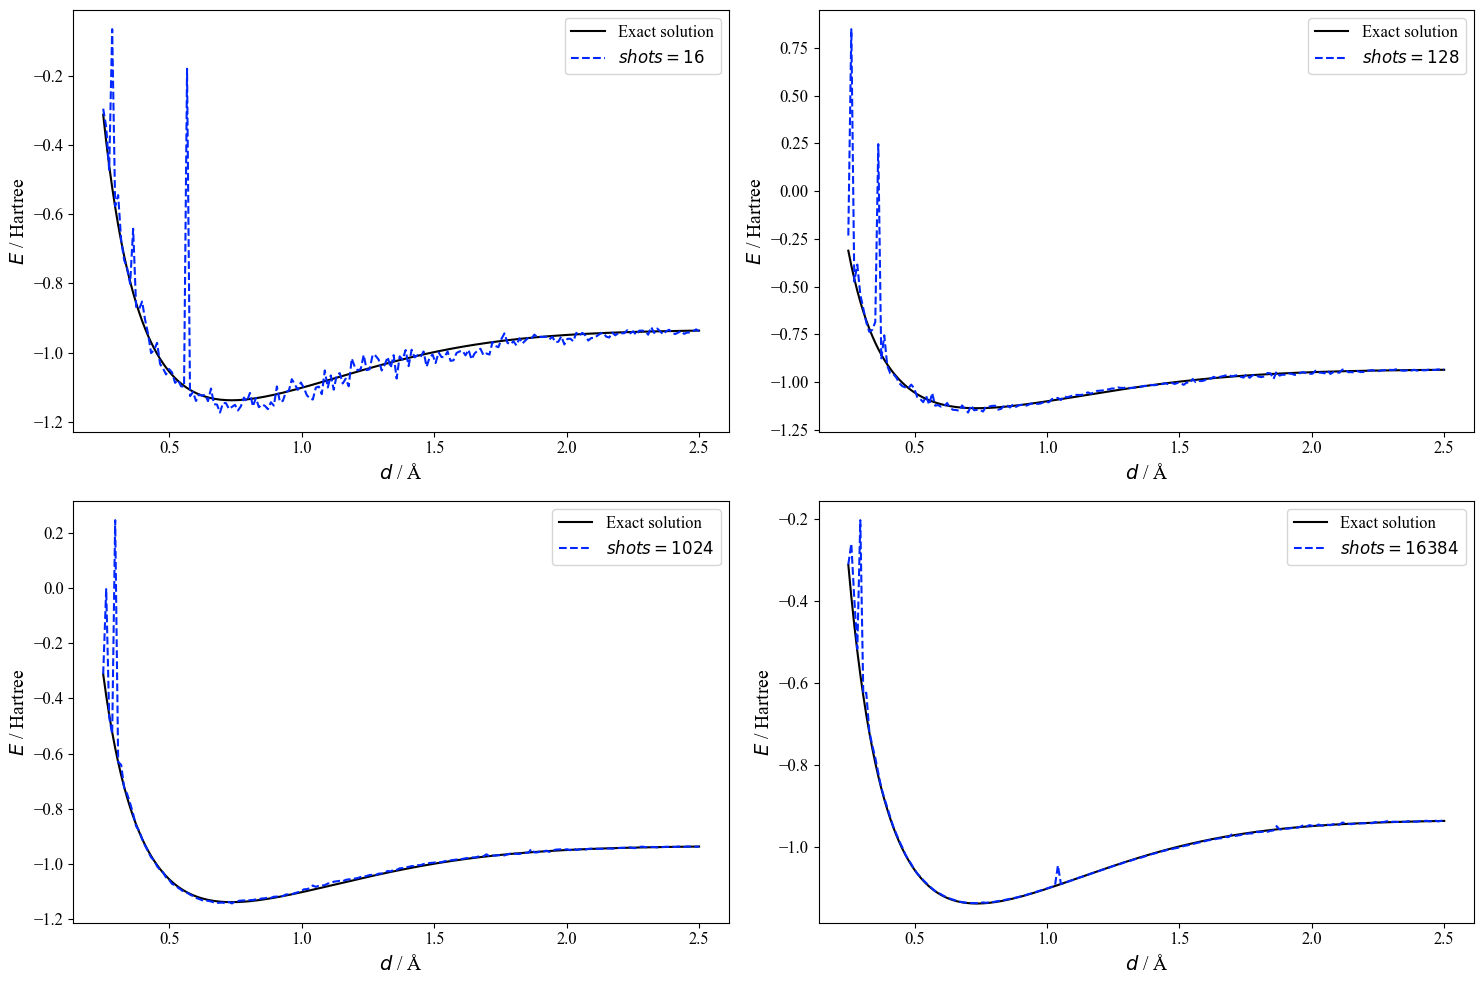

In [55]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

rows = 2
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 10))

for i, file in enumerate(files):
    shots = int(file.split('=')[1].split('.')[0])

    distance  = []
    energy = []
    energy_vqe = []

    with open(f'{folder}/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            distance.append(float(row[0]))
            energy.append(float(row[1]))
            energy_vqe.append(float(row[2]))

        
    row = i // columns
    column = i % columns
    axs[row, column].plot(distance, energy, color='black', marker='', linestyle='-', label='Exact solution')
    axs[row, column].plot(distance, energy_vqe, color='#0027FF', marker='', linestyle='--', label=f'$shots = {shots}$')
    axs[row, column].set_xlabel('$d$ / Å', fontsize=14)
    axs[row, column].set_ylabel('$E$ / Hartree', fontsize=14)
    axs[row, column].grid(False)
    axs[row, column].legend()


plt.tight_layout()
plt.savefig(f'results_{optimizer_str}/{optimizer_str}.png')
plt.show()